# **Decision Tree Assignment**

**Question 1:** What is a Decision Tree, and how does it work in the context of classification?

**Answer:**

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks, but it's most commonly used in classification.

A Decision Tree mimics human decision-making. It's a flowchart-like structure where:
* Each internal node represents a feature (attribute).
* Each branch represents a decision rule.
* Each leaf node represents an outcome (class label).

**Work in Classification**

1. Start with the entire dataset.
2. Choose the best feature to split the data. This is typically based on a metric like:
  * Gini Impurity
  * Entropy / Information Gain
  * Chi-square, etc.
3. Split the dataset into subsets based on this feature’s possible values.
4. Repeat recursively:
  * Choose the best feature for each subset.
  * Continue splitting until:
      * All samples at a node belong to the same class, or
      * You reach a stopping condition (like max depth or minimum samples per node).
5. Classify new data:
  * Start at the root and follow the decisions down the tree according to the feature values of the input.



**Question 2:** Explain the concepts of Gini Impurity and Entropy as impurity measures. How do they impact the splits in a Decision Tree?

**Answer:**

In Decision Trees, Gini Impurity and Entropy are two common measures used to evaluate the "impurity" or disorder of a dataset. These measures help determine the best feature and threshold to split the data at each node, aiming to create the purest possible child nodes.

**1. Gini Impurity**

Definition: Gini Impurity measures the probability of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.

**2. Entropy (Information Gain)**

Definition:  Entropy is a measure from information theory. It quantifies the amount of uncertainty or surprise associated with a random variable.

**Impact on Decision Tree Splits**

When building a decision tree, at each node:
1. Calculate the impurity (Gini or Entropy) of the parent node.
2. Evaluate each possible split, and compute the weighted average impurity of the child nodes.
3. Select the split that leads to the largest impurity reduction (also called Information Gain when using entropy).

    **Information Gain = Impurity (Parent) - Weighted Impurity (Children)**


**Question 3:** What is the difference between Pre-Pruning and Post-Pruning in Decision Trees? Give one practical advantage of using each.

**Answer:**

Pre-Pruning and Post-Pruning are techniques used in Decision Trees to prevent overfitting by controlling the tree's growth.

**Pre-Pruning (Early Stopping)**

Definition:  Pre-pruning stops the tree from growing once a certain condition is met before it becomes too complex.

Common criteria for stopping:
* Maximum depth of the tree
* Minimum number of samples required to split a node
* Minimum information gain or impurity reduction

**Advantage:**

Faster training — because the tree doesn't grow unnecessarily deep, saving time and memory.

**Example:**

A tree stops splitting when a node has fewer than 10 samples.

**Post-Pruning (Pruning After Full Growth)**

Definition:  Post-pruning allows the tree to grow fully, then removes branches that have little importance, based on performance on a validation set.

Common techniques:
* Reduced error pruning
* Cost complexity pruning (used in CART)
* Minimal error pruning

**Advantage:**

Better generalization — because it evaluates the impact of subtrees and only removes what actually hurts validation performance.

**Example:**

After building the full tree, we remove branches that don’t improve accuracy on the validation set.

**Question 4:** What is Information Gain in Decision Trees, and why is it important for choosing the best split?

**Answer:**

**Information Gain in Decision Trees**

Information Gain (IG) is a key metric used to choose the best feature and split at each node of a Decision Tree. It measures how much uncertainty (entropy) is reduced after splitting the dataset based on a particular feature.

**Definition :**  Information Gain is defined as the reduction in entropy after a dataset is split on an attribute.

    Information Gain = Entropy (parent) − Weighted Average

**Why is it Important?**
* Goal of a Decision Tree: Split the data so that each group becomes as pure as possible (i.e., contains mostly one class).
* Information Gain tells us which feature gives us the most reduction in impurity.
* The feature with the highest Information Gain is selected to split the data at that node.


**Question 5:** What are some common real-world applications of Decision Trees, and what are their main advantages and limitations?

**Answer:**

**Real-World Applications of Decision Trees**

Decision Trees are a versatile machine learning model that can be used in a variety of fields. They are particularly useful for classification and regression tasks due to their interpretability and flexibility. Here are some common applications:

**1. Healthcare: Disease Diagnosis**
* Use case: Predicting the likelihood of a patient having a disease based on features such as age, gender, test results, and medical history.
* Example: Classifying whether a patient has diabetes based on glucose levels, blood pressure, etc.
* Why Decision Trees: Easy to interpret and visualize, which helps medical professionals understand why a diagnosis is made.

**2. Finance: Credit Scoring**
* Use case: Determining whether a customer is likely to default on a loan or credit card based on their financial history, income, and spending behavior.
* Example: A decision tree can classify whether a loan application is approved or rejected.
* Why Decision Trees: Transparent and interpretable, which is essential for explaining credit decisions.

**3. Retail: Customer Segmentation & Churn Prediction**
* Use case: Predicting whether a customer will churn (leave) or remain based on purchase history, customer support interactions, and other behavioral data.
* Example: Identifying high-risk customers who are likely to stop using a service, allowing businesses to take preventive actions.
* Why Decision Trees: Can handle both categorical and continuous data and provide insights into factors leading to churn.

**Advantages of Decision Trees**

1. Interpretability: Decision trees are easy to understand and visualize, which makes them highly interpretable even for non-technical users.
2. No Feature Scaling Required: Unlike algorithms like k-NN or SVM, decision trees don’t require normalization or scaling of features.
3. Handles Mixed Data Types: They can handle both numerical and categorical data well.
4. Non-Linear Relationships: They can capture non-linear relationships between features without needing explicit transformation.
5. Handles Missing Data: Decision trees can handle missing data in the features, using methods like surrogate splits.
6. Can Handle Outliers: Less sensitive to outliers compared to other algorithms like linear regression.
7. Fast Prediction: Once trained, decision trees can make predictions very quickly.

**Limitations of Decision Trees**
1. Overfitting: Decision trees tend to overfit, especially when they are too deep or when there are too many branches. This can be mitigated by pruning, cross-validation, or using ensemble methods like Random Forests.
2. Instability: A small change in the data can result in a completely different tree. This is why decision trees can sometimes lack robustness compared to other models.
3. Bias Toward Features with More Categories: Decision trees might favor features with more categories or continuous features, which can lead to biased splits.
4. Complex Trees: A deep tree with many nodes can be computationally expensive, difficult to interpret, and less efficient.
5. Poor Performance with Complex Patterns: Decision trees might struggle to capture complex relationships in data compared to other models like neural networks.
6. Greedy Algorithm: Decision trees use a greedy approach (choosing the best split at each node) which may not always lead to the globally optimal tree.

**Dataset Info:**
* Iris Dataset for classification tasks (sklearn.datasets.load_iris() or provided CSV).
* Boston Housing Dataset for regression tasks (sklearn.datasets.load_boston() or provided CSV).

**Question 6:** Write a Python program to:
* Load the Iris Dataset
* Train a Decision Tree Classifier using the Gini criterion
* Print the model’s accuracy and feature importances

(Include your Python code and output in the code box below.)

**Answer:**

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [158]:
# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()

In [159]:
feature_names = data.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [160]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [161]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [162]:
X = df
y = data.target

In [163]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [164]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [165]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [166]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [167]:
# Train the Decision Tree using Gini criterion
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state = 42)
classifier

DecisionTreeClassifier(random_state=42)

In [168]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.4, 0.9, 'x[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

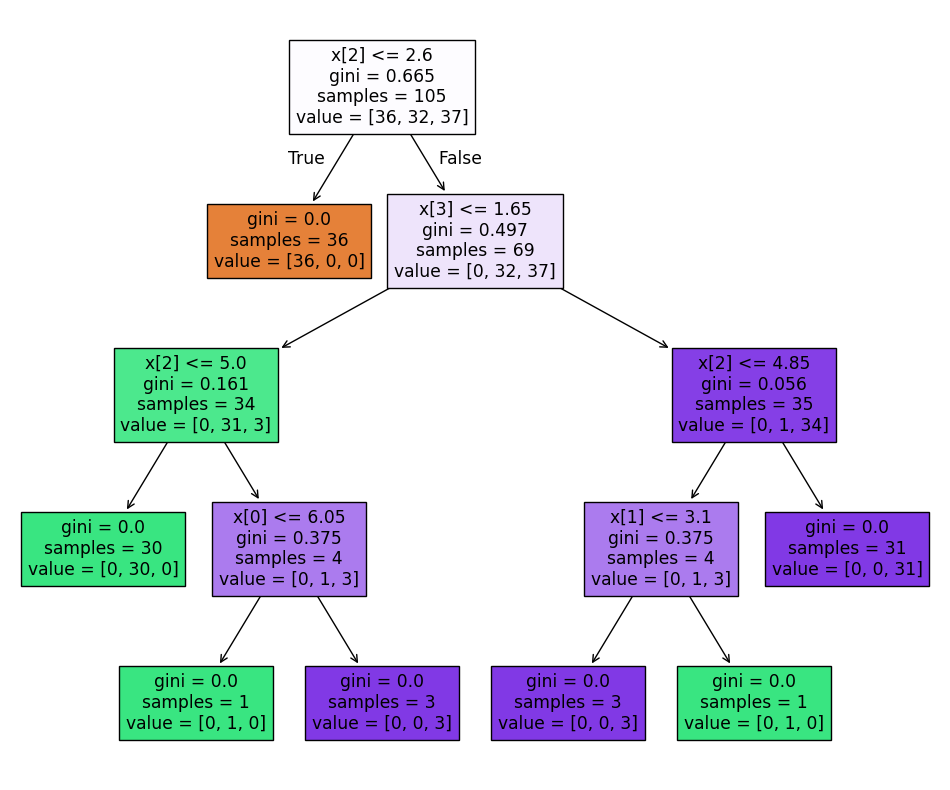

In [169]:
from sklearn import tree
plt.figure(figsize=(12, 10))
tree.plot_tree(classifier, filled=True)

In [170]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556

In [172]:
# Feature Importances
from sklearn.metrics import accuracy_score
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': importances}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
2,petal length (cm),0.571965
3,petal width (cm),0.385096
1,sepal width (cm),0.021469
0,sepal length (cm),0.021469


**Question 7:** Write a Python program to:
* Load the Iris Dataset
* Train a Decision Tree Classifier with max_depth=3 and compare its accuracy to a fully-grown tree.

(Include your Python code and output in the code box below.)

**Answer:**

In [173]:
# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()

In [174]:
feature_names = data.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [175]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [176]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [177]:
X = df
y = data.target

In [178]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [179]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [180]:
# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [182]:
# Train Decision Tree with max_depth=3
from sklearn.tree import DecisionTreeClassifier
tree_limited = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [183]:
tree_limited.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [184]:
y_pred_limited = tree_limited.predict(X_test)
y_pred_limited

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [185]:
from sklearn.metrics import accuracy_score
acc_limited = accuracy_score(y_test, y_pred_limited)
acc_limited

1.0

In [186]:
tree_full = DecisionTreeClassifier(criterion='gini', random_state=42)

In [187]:
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [188]:
y_pred_full = tree_full.predict(X_test)
y_pred_full

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [189]:
acc_full = accuracy_score(y_test, y_pred_full)
acc_full

1.0

**Question 8:** Write a Python program to:

* Load the Boston Housing Dataset  
* Train a Decision Tree Regressor
* Print the Mean Squared Error (MSE) and feature importances

(Include your Python code and output in the code box below.)

**Answer: **

In [190]:
import numpy as np
import pandas as pd

In [191]:
# Load the California Housing dataset (Boston dataset is deprecated)
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [192]:
X = data.data
y = data.target

In [193]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [194]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [195]:
feature_names = data.feature_names

In [196]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [197]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
# Train Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

In [199]:
model

DecisionTreeRegressor(random_state=42)

In [200]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [201]:
# Predict and Evaluate
y_pred = model.predict(X_test)

In [202]:
y_pred

array([0.414  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.172  ])

In [203]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [204]:
mse

0.495235205629094

In [205]:
# Feature Importances
importances = model.feature_importances_

In [206]:
importances

array([0.52850909, 0.05188354, 0.05297497, 0.02866046, 0.03051568,
       0.13083768, 0.09371656, 0.08290203])

In [207]:
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance' : importances}).sort_values(by='Importance', ascending=False)

In [208]:
feature_importance_df

,Feature,Importance
0,MedInc,0.528509
5,AveOccup,0.130838
6,Latitude,0.093717
7,Longitude,0.082902
2,AveRooms,0.052975
1,HouseAge,0.051884
4,Population,0.030516
3,AveBedrms,0.028660


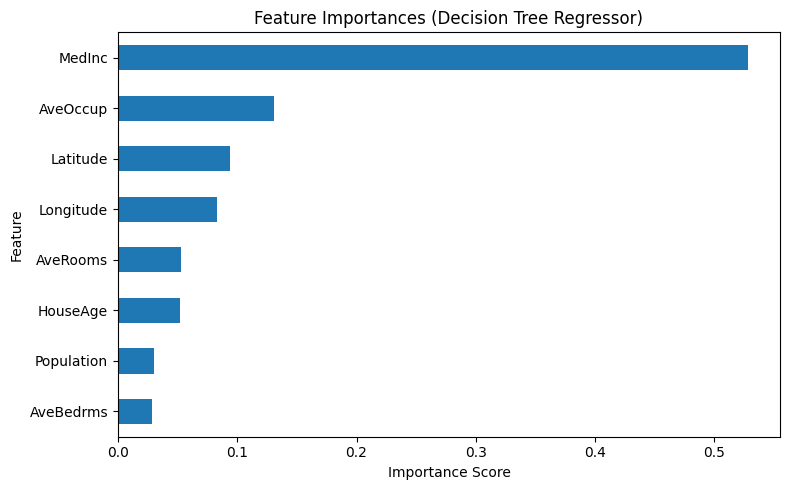

In [209]:
# Bar Plot of Feature Importances
import matplotlib.pyplot as plt

feature_importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False,
figsize=(8, 5))
plt.gca().invert_yaxis()
plt.title('Feature Importances (Decision Tree Regressor)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

**Question 9:** Write a Python program to:

* Load the Iris Dataset
* Tune the Decision Tree’s max_depth and min_samples_split using GridSearchCV
* Print the best parameters and the resulting model accuracy

(Include your Python code and output in the code box below.)

**Answer:**

In [210]:
from sklearn.datasets import load_iris
iris = load_iris()

In [211]:
X = iris.data
y = iris.target

In [212]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [214]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5]
}
param_grid

{'max_depth': [2, 3, 4, 5, 6], 'min_samples_split': [2, 3, 4, 5]}

In [215]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [216]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [217]:
best_params = grid_search.best_params_
best_params

{'max_depth': 3, 'min_samples_split': 2}

**Question 10:** Imagine you’re working as a data scientist for a healthcare company that wants to predict whether a patient has a certain disease. You have a large dataset with mixed data types and some missing values.

Explain the step-by-step process you would follow to:

* Handle the missing values
* Encode the categorical features
* Train a Decision Tree model
* Tune its hyperparameters
* Evaluate its performance
  
  And describe what business value this model could provide in the real-world setting.

**Answer:**

In [218]:
import pandas as pd
import numpy as np

In [219]:
# Simulated data with numerical + categorical + missing values
data = {
    'age': [63, 37, 41, 56, np.nan, 57, 62, 57, np.nan, 54],
    'sex': ['male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'female', np.nan],
    'cp': ['typical', 'asymptomatic', 'non-anginal', 'atypical', 'asymptomatic', 'atypical', np.nan, 'non-anginal', 'typical', 'asymptomatic'],
    'trestbps': [145, 130, 130, 120, 120, 140, np.nan, 120, 140, 150],
    'chol': [233, 250, 204, 236, 354, 192, 294, 298, np.nan, 198],
    'fbs': ['true', 'false', 'false', 'false', 'true', 'false', 'false', 'true', np.nan, 'false'],
    'target': [1, 1, 1, 1, 0, 0, 0, 0, 1, 1]
}

In [220]:
df = pd.DataFrame(data)

In [221]:
df

,age,sex,cp,trestbps,chol,fbs,target
0,63.0,male,typical,145.0,233.0,true,1
1,37.0,male,asymptomatic,130.0,250.0,false,1
2,41.0,female,non-anginal,130.0,204.0,false,1
3,56.0,female,atypical,120.0,236.0,false,1
4,NaN,male,asymptomatic,120.0,354.0,true,0
5,57.0,female,atypical,140.0,192.0,false,0
6,62.0,male,NaN,NaN,294.0,false,0
7,57.0,male,non-anginal,120.0,298.0,true,0
8,NaN,female,typical,140.0,NaN,NaN,1
9,54.0,NaN,asymptomatic,150.0,198.0,false,1


In [222]:
X = df.drop('target', axis=1)
y = df['target']

In [223]:
X

,age,sex,cp,trestbps,chol,fbs
0,63.0,male,typical,145.0,233.0,true
1,37.0,male,asymptomatic,130.0,250.0,false
2,41.0,female,non-anginal,130.0,204.0,false
3,56.0,female,atypical,120.0,236.0,false
4,NaN,male,asymptomatic,120.0,354.0,true
5,57.0,female,atypical,140.0,192.0,false
6,62.0,male,NaN,NaN,294.0,false
7,57.0,male,non-anginal,120.0,298.0,true
8,NaN,female,typical,140.0,NaN,NaN
9,54.0,NaN,asymptomatic,150.0,198.0,false


In [224]:
y

,target
0,1
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [225]:
# Identify feature types
numerical_features = ['age', 'trestbps', 'chol']
categorical_features = ['sex', 'cp', 'fbs']

In [226]:
# Numerical pipeline: impute missing values with median
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [227]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [228]:
# Categorical pipeline: impute missing with 'Missing', then one-hot encode
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [229]:
cat_pipeline

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [230]:
# Combine pipelines
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

In [231]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['age', 'trestbps', 'chol']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs'])])

In [232]:
# Full pipeline
from sklearn.tree import DecisionTreeClassifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [233]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'trestbps', 'chol']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [234]:
# Tain, Test, Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [235]:
X_train

,age,sex,cp,trestbps,chol,fbs
1,37.0,male,asymptomatic,130.0,250.0,false
7,57.0,male,non-anginal,120.0,298.0,true
5,57.0,female,atypical,140.0,192.0,false
3,56.0,female,atypical,120.0,236.0,false
9,54.0,NaN,asymptomatic,150.0,198.0,false
8,NaN,female,typical,140.0,NaN,NaN
0,63.0,male,typical,145.0,233.0,true
4,NaN,male,asymptomatic,120.0,354.0,true


In [236]:
y_test

,target
6,0
2,1


In [237]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'trestbps', 'chol']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [238]:
y_pred = model.predict(X_test)
y_pred

array([0, 1])

In [239]:
y_proba = model.predict_proba(X_test)[:, 1]
y_proba

array([0., 1.])

In [240]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [241]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]
ROC AUC Score: 1.0


In [242]:
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

In [243]:
param_grid

{'classifier__max_depth': [3, 5, 10, None],
 'classifier__min_samples_split': [2, 5, 10],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__criterion': ['gini', 'entropy']}

In [244]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [245]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [246]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'trestbps', 'chol']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_split=10,
                                        random_state=42))])

In [247]:
y_pred_best = best_model.predict(X_test)
y_pred_best

array([1, 1])

In [248]:
y_proba_best = best_model.predict_proba(X_test)[:, 1]
y_proba_best

array([0.625, 0.625])

In [249]:
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_best))
print("Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Tuned ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Tuned Confusion Matrix:
 [[0 1]
 [0 1]]
Tuned ROC AUC Score: 0.5
